In [1]:
import numpy as np
import pandas as pd

from subprocess import check_output
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('archive/FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query("SELECT * FROM 'Fires'", conn)

 First, I want to see how the number of wildfires may vary up to year/date. We can take a look at the following bar graph and at 2006 there are too many wildfires compared to other years. 

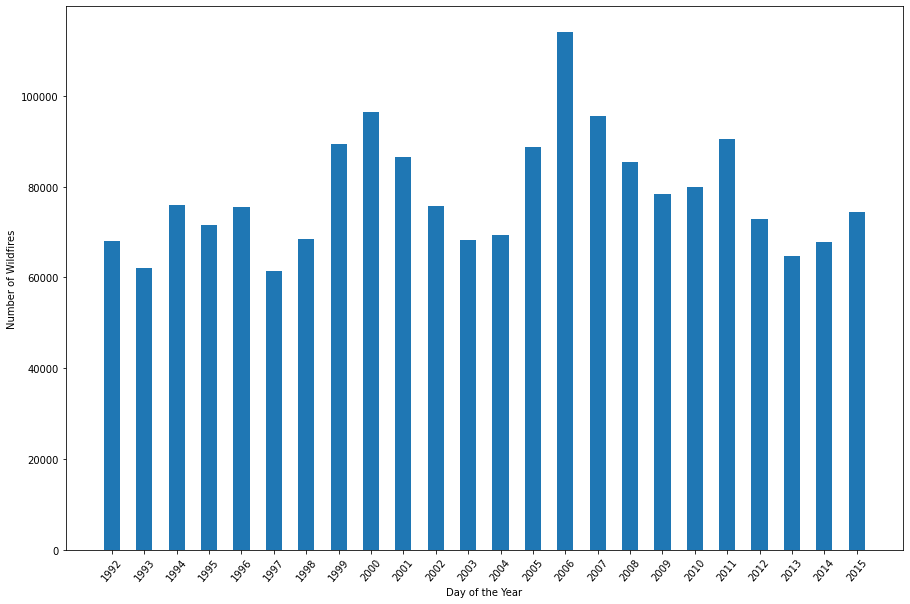

In [15]:
# 
fig= plt.figure(figsize=(15,10))
fire_year = df.groupby('FIRE_YEAR').size()
plt.bar(range(len(fire_year)), fire_year.values, width = 0.5)
plt.xlabel('Day of the Year')
plt.ylabel('Number of Wildfires')
plt.xticks(range(len(fire_year)), fire_year.index, rotation = 50)
plt.show()

Moreover, it also varies up to date. We can see some local maximums on April and July and local minimum on May and June. 

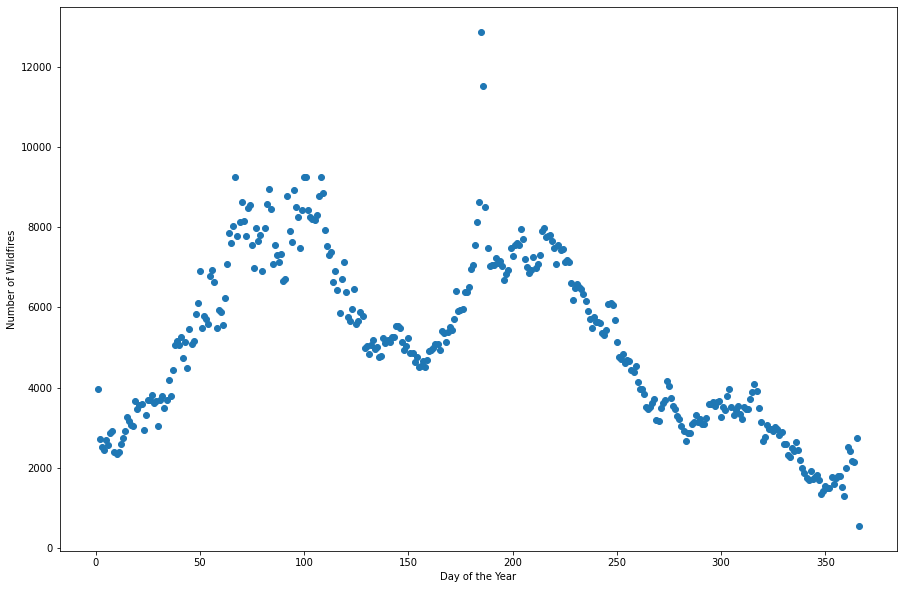

In [14]:
fig= plt.figure(figsize=(15,10))
fire_date = df.groupby('DISCOVERY_DOY').size()
plt.xlabel('Day of the Year')
plt.ylabel('Number of Wildfires')
plt.scatter(fire_date.index, fire_date.values)
plt.show()

Lastly, I want to see the relation between the cause and the fire year.  Interestingly, there are a large number of wildfires in 2006 because of Debris Burning. 

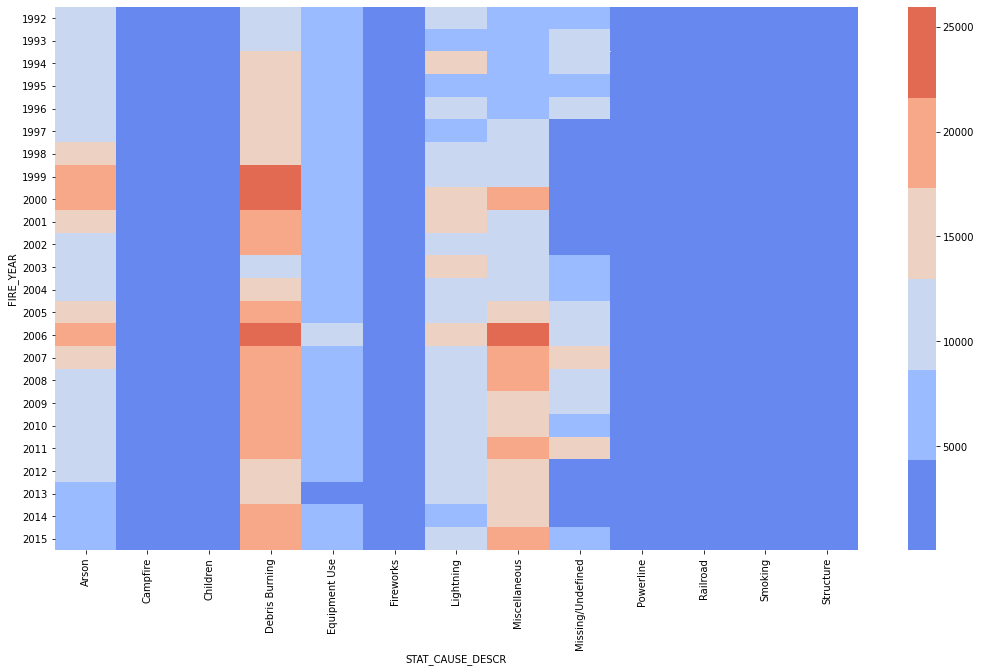

In [13]:
fig= plt.figure(figsize=(18,10))
colormap = sns.color_palette("coolwarm")
sns.heatmap(pd.crosstab(df.FIRE_YEAR, df.STAT_CAUSE_DESCR), cmap=colormap)
plt.show()